#### Patrick Mugisha, "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Multiple Regression Analysis: Baseball Analytics & HR Analytics

- The goal of regression model is to **minimize Sum of Squared Error (SSE)**

                             minimize SSE
 
- **The model with multiple X variables is likely to reduce SSE. This makes multiple regression more powerful than single variable regression (or univariate regression)**

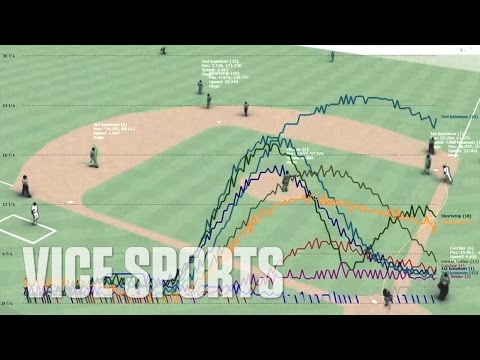

In [1]:
# Future of the Game: Baseball's Latest Statistical Revolution

from IPython.display import YouTubeVideo
YouTubeVideo('9rOKGKhQe8U')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm       #for machine learning

#model validation                       #for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#model evaluation                       #for machine learning
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#statistical regression analysis        #for traditional statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning                        
import warnings
warnings.filterwarnings("ignore")

In [18]:
# import data
teams = pd.read_csv("data/baseball.csv")
teams.head()

,yearID,teamID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,2000,CHA,1,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,2000,CLE,2,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174
2,2000,DET,3,823,827,162,79,1553,562,43,5644,49,177,307,41,58265167,0.275159,0.342648,0.438164
3,2000,KCA,4,879,930,162,77,1644,511,48,5709,70,150,281,27,23433000,0.287966,0.347586,0.425469
4,2000,MIN,5,748,880,162,69,1516,556,35,5615,51,116,325,49,16519500,0.269991,0.336743,0.407302


On Base Percentage (OBP, On Base Average, OBA) is a measure of how often a batter reaches base. 

The full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). Batters are not credited with reaching base on an error or fielder's choice, and they are not charged with an opportunity if they make a sacrifice bunt.

All Time Leaders
Ted Williams	.482	(career)
Barry Bonds	    .609	(2004 season)

http://www.baseball-reference.com/bullpen/On_base_percentage

In [19]:
# run correlation analysis

teams.corr()['R'].sort_values()

Rank     -0.474251
yearID   -0.408178
G         0.104248
3B        0.107528
salary    0.133647
RA        0.205996
HBP       0.247722
SF        0.500949
W         0.549933
BB        0.585743
2B        0.589721
AB        0.614868
HR        0.700291
H         0.806592
BA        0.811295
OBP       0.898274
SLG       0.915136
R         1.000000
Name: R, dtype: float64

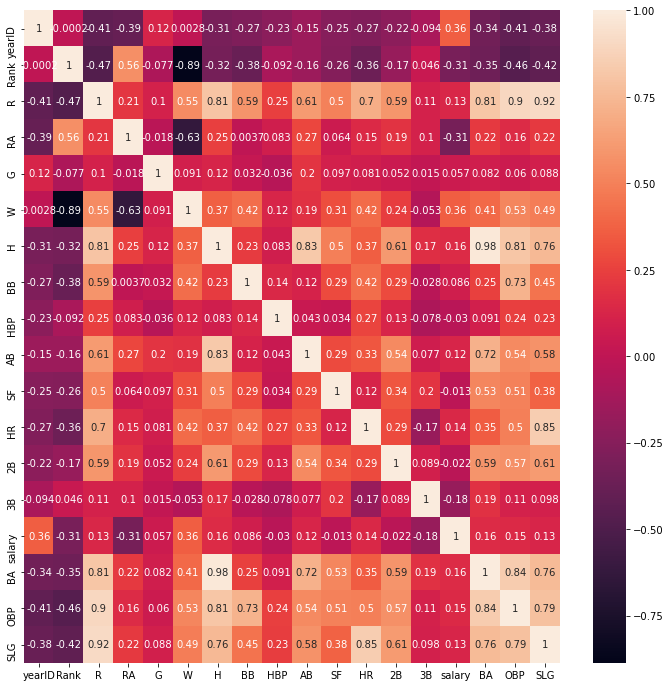

In [20]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(teams.corr(), annot=True);

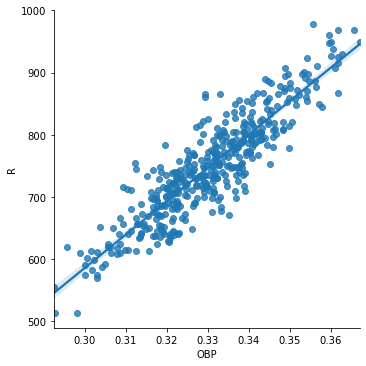

In [21]:
# lmplot
sns.lmplot(x='OBP', y='R', data=teams);

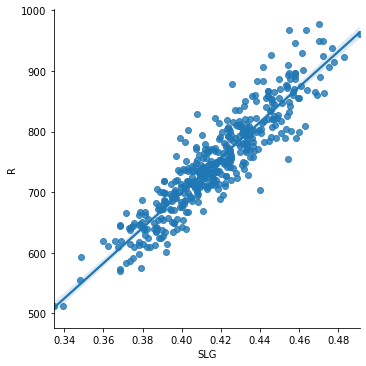

In [22]:
# lmplot for SLG and R

sns.lmplot(x='SLG', y='R', data=teams);

# Model Development / Evaluation / Deployment
- We use **scikit**, the python package for statistical analysis and data mining (predictive analytics)

In [23]:
# remove unnecessary columns ('yearID', 'teamID', 'Rank')

teams = teams.drop(['yearID', 'teamID', 'Rank'], axis=1)
teams.head(2)

,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


In [24]:
#assigning columns to X and Y variables

y = teams['R'] 
#X = teams[['RA','G','W','H','BB','HBP','AB','SF','HR','2B','3B','salary','BA','OBP','SLG']]
X = teams.drop(['R'], axis =1)  #a simple way to assign X variables (preferred)

# X contains (too) many independent variables or predictors ... we will see how it goes

In [25]:
y.head(2)

0    978
1    950
Name: R, dtype: int64

In [26]:
X.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


## Model #1

We will build a few regression models and compare their performance. This is our first regression model.

### Model Validation: Split validation 

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset** (See Appendix for more details)

> **Two types of model validation**: 
 1. **split validation** (70% of the original data as training and the other 30% as testing dataset)
 2. **cross validation** (90% of the original data as training and the other 10% as testing dataset): This allows to test the model quality 10 times. The average value is used to measure the model performance

This concept is same as **taking ACT exam**. There are two periods: **prep / practice test** and **actual testing**. **prep / practice test** is like **training data** and **actual testing** is like **testing data**. Your final ACT score is based on **actual test**, not practice test. Likewise, the **accuracy of predictive (regression) model** is based on **testing dataset**. 

<img src="images/splitvalidation.png">

In [27]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 15) (294,) (126, 15) (126,)


In [29]:
# let's double check 

print(len(teams))
print(len(teams) * 0.7)   # 70% of the original data  (training data)
print(len(teams) * 0.3)   # 30% of the original data  (testing data)

420
294.0
126.0


In [32]:
X_train.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
106,796,162,85,1580,580,73,5672,54,196,342,32,83786666,0.278561,0.350055,0.453808
378,759,162,61,1297,447,43,5411,24,137,265,36,88197033,0.239697,0.301603,0.377934


In [33]:
y_train.head(2)

106    876
378    613
Name: R, dtype: int64

In [34]:
X_test.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
124,905,162,58,1432,461,76,5538,38,150,261,29,47609000,0.258577,0.322100,0.397436
341,633,162,86,1394,442,51,5513,32,155,289,34,138543166,0.252857,0.312521,0.401959


In [35]:
y_test.head(2)

124    720
341    667
Name: R, dtype: int64

### Model Building

In [37]:
# build a multiple regression model below ... this is our first regression model ... "full" model since using all variables

model1 = lm.LinearRegression()      #initialize algorithm you're interested in
model1.fit(X_train, y_train)        #train our model with training dataset
model1_y = model1.predict(X_test)   #predicts y-value using training data above

In [38]:
# this is regression so it has coefficients and y-intercept

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.13012127e-01  1.99105792e+00  2.14514379e+00  5.52293491e+00
  2.76654430e-01  3.48588512e-01 -1.27116763e+00  5.77331454e-01
 -1.51122378e+00 -5.75434334e-01 -7.32024230e-01 -3.16532956e-08
 -3.19456454e+04 -4.76783231e+02  4.20598272e+03]
y-intercept  6144.684397622


In [39]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)

,0,1
0,RA,0.21
1,G,1.99
2,W,2.15
3,H,5.52
4,BB,0.28
5,HBP,0.35
6,AB,-1.27
7,SF,0.58
8,HR,-1.51
9,2B,-0.58


### Model Evaluation

In [40]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  367.8488762649807
variance or r-squared:  0.9513042801552827


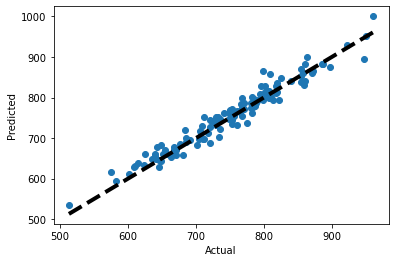

In [41]:
plt.subplots()
plt.scatter(y_test, model1_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

This full model seems better than a model (univariate regression model) with one X variable, but would be too complex to be practical in sports management (hiring baseball players)

## Model #2

Now, we'will try to build a simpler regression model with fewer variables

In [43]:
# Choose two variables as X (OBP, SLG) and develop a multiple linear regression model (model2).

y=teams['R']
X=teams[['OBP', 'SLG']]

### Model validation

In [44]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 2) (294,) (126, 2) (126,)


In [45]:
X_train.head(2)

,OBP,SLG
106,0.350055,0.453808
378,0.301603,0.377934


### Model building

In [46]:
# build a multiple regression model below

model2 = lm.LinearRegression()      
model2.fit(X_train, y_train)        
model2_y = model2.predict(X_test)

In [47]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_)))).round(2)

,0,1
0,OBP,2709.75
1,SLG,1782.78


In [48]:
print("y-intercept ", model2.intercept_)

y-intercept  -887.7503848471632


## FINAL LINEAR EQUATION
y = (2709.75 x OBP) + (1782.78 X SLG) - 887

### Model evaluation

In [49]:
print("mean square error: ", mean_squared_error(y_test, model2_y))
print("variance or r-squared: ", explained_variance_score(y_test, model2_y))

mean square error:  412.9097713776273
variance or r-squared:  0.9472019942597845


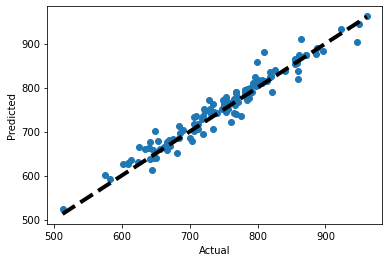

In [52]:
plt.subplots()
plt.scatter(y_test, model2_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')   #dashed black line in graph below
plt.show()

## Model #3

In [53]:
# Choose three variables (BA, OBP, SLG) and develop a multiple linear regression model (model3).

y = teams['R'] 
X = teams[['OBP', 'SLG', 'BA']]

### Model validation

In [54]:
# split validation (70% training & 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 3) (294,) (126, 3) (126,)


### Model building

In [55]:
model3 = lm.LinearRegression()
model3.fit(X_train, y_train)   
model3_y = model3.predict(X_test)

In [56]:
pd.DataFrame(list(zip(X.columns, np.transpose(model3.coef_)))).round(2)

,0,1
0,OBP,2619.46
1,SLG,1763.07
2,BA,167.17


In [57]:
print("y-intercept ", model3.intercept_)

y-intercept  -893.5422959107458


In [58]:
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  415.24760101081205
variance or r-squared:  0.9469976286082737


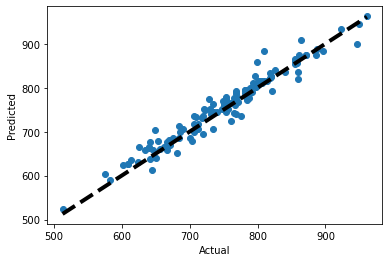

In [59]:
plt.subplots()
plt.scatter(y_test, model3_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

> - Model #1 is the full model using all available variables: highest accuracy but too complex to be practical
> - Model #2 is a very simple model using only two variables: high accuracy and simple/practical model
> - Model #3 is a relatively simple model with three variables: not necessarily better than Model #2

## Model Deployment : Predictive Analytics (Predicting Y value)

- This stage is the goal of predictive analytics (e.g., regression)
- **Scoring dataset** (e.g., baseball_scoringdataset.csv) refers to a dataset without y value. This type of dataset usually refers to the data from **"the future"**
- On the other hand 'baseball.csv' is called **training dataset** because the model is built on that dataset.
- This could be tomorrow's stock price, the next quarter's employment rate or oil price, the next season's team performance, etc. 
- Your model is used to predict y value for this dataset

In [60]:
# loading the scoring datset
scoring = pd.read_csv("data/baseball_scoringdataset.csv")
scoring.head()

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,753,162,103,1604,663,54,5660,39,244,325,21,201449189,0.283392,0.361752,0.477562
1,736,162,95,1495,659,70,5543,51,212,335,25,121345999,0.269710,0.351732,0.453906
2,754,162,84,1434,642,49,5462,45,199,297,36,63313034,0.262541,0.342853,0.439399
3,771,162,75,1516,548,45,5696,49,209,339,13,80538300,0.266152,0.332755,0.440309
4,876,162,64,1508,517,39,5618,46,160,307,19,67101666,0.268423,0.331833,0.415272


### Use Model 2 to predictive the next season's team performance

In [61]:
# We use model2 to predict y value. model2 considered only two X variables (OBP, SLG)

columns = scoring[['OBP', 'SLG']]
model2.predict(columns)

array([943.89474156, 874.56933095, 824.64719464, 798.90630515,
       751.7730746 , 847.85379903, 771.23973443, 678.84785707,
       710.26069156, 752.10256409, 736.153001  , 796.34416107,
       675.49617785, 690.39183248, 664.50067198, 814.29822224,
       775.32356818, 752.72690757, 723.17336582, 748.16628462,
       783.34540417, 827.24655468, 644.40648051, 660.07188565,
       735.87746853, 787.01307022, 759.85971484, 760.75979987,
       658.18007945, 721.1646164 , 732.68159832, 837.41693816,
       834.98785242, 767.86188126, 656.01523074, 775.30967398,
       665.03491112, 651.54167463, 524.79823072, 806.59319501,
       727.21081745, 774.84517267, 578.57091787, 694.11776987,
       602.0449626 , 748.82722986, 745.51743087, 699.94040307,
       646.58092619, 670.04978135, 710.43344221, 634.39505961,
       779.0338433 , 659.10112777, 733.03068553, 805.86576597,
       678.81379313, 666.85692389, 742.73711433, 583.74832792,
       834.60706146, 701.57727059, 878.80626919, 706.48

### Use Model 3 to predictive the next season's team performance

In [62]:
# use model3 to predict y value for the scoring dataset.

# we used three columns ('OBP', 'SLG', 'BA') for model 3

columns = scoring[['OBP', 'SLG', 'BA']]
model3.predict(columns)

array([943.40249516, 873.16066569, 823.127804  , 798.88434424,
       752.70742857, 849.44961896, 771.26686151, 679.93803945,
       710.81707642, 752.06913525, 735.00136196, 795.25333849,
       674.55001297, 691.41198298, 664.43905283, 812.65994912,
       775.40856001, 752.40218411, 724.48140014, 747.08003863,
       783.38257896, 825.40073411, 645.95344484, 658.33632013,
       734.8576879 , 787.81426845, 760.55689288, 761.40058196,
       657.39045711, 723.37479854, 730.1708998 , 836.03923054,
       834.43154917, 766.43038946, 657.45693284, 776.88884259,
       665.34085418, 651.47087142, 524.78693454, 807.04398038,
       727.47720108, 774.3432226 , 579.62486597, 694.4381233 ,
       601.87534503, 748.37422295, 744.39369146, 699.63268053,
       646.48370822, 669.64684932, 710.57853471, 633.78715994,
       778.45821106, 658.95470381, 731.45712854, 807.1296676 ,
       678.43542155, 666.794975  , 745.067992  , 584.55584806,
       833.04558431, 699.51383793, 879.28435826, 705.58

# Multiple Regression using Statsmodels

- ***scikit*** for machine learning (model deployment and prediction)
- ***Statsmodels*** for traditional statistical analysis (causual analysis and explanation); offers **p-value** (statistical significance testing)

In [63]:
# without two columns: 2B, 3B (Python does not like the variables starting with number)
runs_reg_model = ols("R~RA+G+W+H+BB+HBP+AB+SF+HR+salary+BA+OBP+SLG",teams)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     524.9
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          1.81e-244
Time:                        15:31:21   Log-Likelihood:                -1850.7
No. Observations:                 420   AIC:                             3729.
Df Residuals:                     406   BIC:                             3786.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3904.7724   1479.247      2.640      0.0

In [64]:
runs_reg.mse_resid.round(2)

406.94

In [65]:
runs_reg.params.round(2)

Intercept     3904.77
RA               0.22
G                0.97
W                2.15
H                3.52
BB               0.32
HBP              0.38
AB              -0.84
SF               0.52
HR               0.03
salary          -0.00
BA          -17489.11
OBP           -796.10
SLG           1254.65
dtype: float64

> Too many variables --> Model looks unstable (e.g, BA -17489.11, OBP -796.10)

In [66]:
# Choose a smaller set of multiple variables as X (OBP, SLG) and develop a multiple linear regression model with statsmodel.

runs_reg_model2 = ols("R~OBP+SLG",teams)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2362.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          3.39e-228
Time:                        15:35:58   Log-Likelihood:                -1927.8
No. Observations:                 420   AIC:                             3862.
Df Residuals:                     417   BIC:                             3874.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -894.6863     28.041    -31.906      0.0

In [67]:
runs_reg2.mse_resid.round(2)

572.2

In sklearn, the MSE is calculated as np.median(np.abs(y_pred - y_true)). But, the Statsmodels document says "Mean squared error of the residuals = The sum of squared residuals divided by the residual degrees of freedom."

As a result, the MSE value from Statsmodels would be slightly higher that from sklearn.

In [68]:
runs_reg2.params.round(2)

Intercept    -894.69
OBP          2782.59
SLG          1736.98
dtype: float64

# Appendix

## With fewer independent variables

### Recruting strategy based on Bill Beane's Formula: Bill's "Hiring" Strategy

Based on the analysis above, a good strategy for recruiting batters would focus on targeting **undervalued players with high OBP and SLG**. In the late 1990s, **the old school scouts overvalued BA, and players with high BA had high salaries**. Although BA and OBP have a positive correlation, **there were some players that have high OBP and SLG, and relatively small BA**. These players were undervalued by the market, and were the target of Billy Beane.

In [69]:
#First Model
runs_reg_model1 = ols("R~OBP+SLG+BA",teams)
runs_reg1 = runs_reg_model1.fit()
#Second Model
runs_reg_model2 = ols("R~OBP+SLG",teams)
runs_reg2 = runs_reg_model2.fit()
#Third Model
runs_reg_model3 = ols("R~BA",teams)
runs_reg3 = runs_reg_model3.fit()

- The first one will have as features OBP, SLG and BA. 
- The second model will have as features OBP and SLG. 
- The last one will have as feature BA only.

In [70]:
print(runs_reg1.summary())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(runs_reg2.summary())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(runs_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1572.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          1.65e-226
Time:                        15:48:15   Log-Likelihood:                -1927.7
No. Observations:                 420   AIC:                             3863.
Df Residuals:                     416   BIC:                             3880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -898.1717     28.975    -30.998      0.0

- The first model has an Adjusted R-squared of 0.918, with 95% confidence interval of BA between **-283 and 468**. This is counterintuitive, since we expect the BA value to be positive. This is due to a **multicollinearity** between the variables.

- The second model has an Adjusted R-squared of 0.919, and the last model an Adjusted R-squared of 0.500.

- Based on this analysis, we could confirm that the **second model** using **OBP** and **SLG** is the best model for predicting Run Scored.

### Multicollinearity
- The **X variables (or predictors) are highly correlated**. This causes the coefficient estimates (e.g., BA, OBP) to be **unstable** 
- Thus, the regression model should be **as simple as possible** (having a fewer number of variables) ... **simplicity** is important, but **not too simple either**
- You may consider advanced regression techniques such as **lasso** to deal with multicollinearity. lasso removes highly correlated variables from the model. This is called **"feature selection** in regression. This type of regression helps develop **simple or parsimonious models**.

In [71]:
# high values indicate multicollinearity
print(np.linalg.cond(runs_reg.model.exog))                   # full model
print(np.linalg.cond(runs_reg1.model.exog))                  # model with three variables 
print(np.linalg.cond(runs_reg2.model.exog))                  # model with two variables 
print(np.linalg.cond(runs_reg3.model.exog))

691095102048.7213
228.19034548031317
145.38589264441808
90.69181936411024


## Normalization

- scale input data (X) to unit norm. This data preprocessing can be considered before building models. 

In [72]:
# Example

from sklearn.preprocessing import normalize

data = [[ 1., -10.,  2.],
    [ 2.,  0.,  10.],
    [ 0.,  10., -1.]]

X_normalized = normalize(data)

X_normalized   # this shows the results of normalizing data

array([[ 0.09759001, -0.97590007,  0.19518001],
       [ 0.19611614,  0.        ,  0.98058068],
       [ 0.        ,  0.99503719, -0.09950372]])

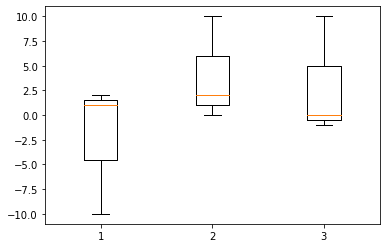

In [73]:
plt.boxplot(data);

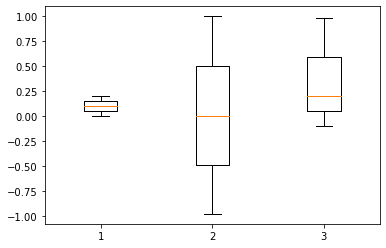

In [74]:
# columns are normalized ... in same scale
plt.boxplot(X_normalized);

Apply normalizer to our baseball data and run regresssion analysis

In [75]:
y = teams['R'] 
X = teams.drop(['R'], axis =1)

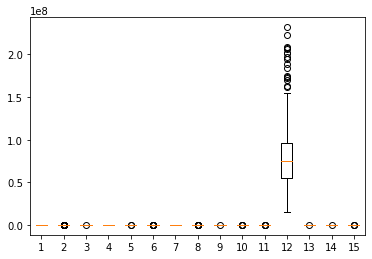

In [76]:
# data is not scaled ... some columns (e.g., 12 salary) have wide scales
plt.boxplot(X);

In [77]:
X.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


salary appears to be not a good predictor for R (run). So let's remove it. This is an experiment :)

In [79]:
from sklearn.preprocessing import Normalizer

y = teams['R'] 
X = teams.drop(['R','salary'], axis =1)   # remove salary

# model building
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[1.40352992e-01, 2.71003394e-02, 1.58921743e-02, ...,
        4.78510385e-05, 5.95023110e-05, 7.86357005e-05],
       [1.35430543e-01, 2.68869460e-02, 1.49371922e-02, ...,
        4.78660685e-05, 6.09142183e-05, 7.80342496e-05],
       [1.38937033e-01, 2.72162023e-02, 1.32720986e-02, ...,
        4.62271330e-05, 5.75653691e-05, 7.36121700e-05],
       ...,
       [1.21700363e-01, 2.81649412e-02, 1.32131823e-02, ...,
        4.25111448e-05, 5.35034780e-05, 6.57047715e-05],
       [1.18962232e-01, 2.78898431e-02, 1.30841239e-02, ...,
        4.48383778e-05, 5.51294187e-05, 6.56451217e-05],
       [1.29330768e-01, 2.75678742e-02, 1.25927327e-02, ...,
        4.59242700e-05, 5.49068394e-05, 7.12114919e-05]])

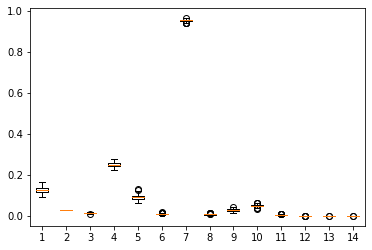

In [80]:
# boxplot ... data is normalized ... all columns are in same scale
plt.boxplot(normalizedX);

In [81]:
# split validation (70% training & 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(normalizedX, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 14) (294,) (126, 14) (126,)


In [82]:
model = lm.LinearRegression()
model.fit(X_train, y_train)
model_y = model.predict(X_test)
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [-6.15914518e+02  2.91477952e+04  1.22319233e+04  7.29818320e+03
 -3.89034736e+03 -2.24927254e+03 -1.63734818e+04  5.49799233e+03
  1.19785045e+04  3.11614369e+03  9.71097821e+03 -6.33189637e+07
  3.58349041e+07 -1.49918597e+07]
y-intercept  15296.984043988563


In [83]:
print("mean square error: ", mean_squared_error(y_test, model_y))
print(explained_variance_score(y_test, model_y))

mean square error:  345.47106036848595
0.9539246406060563


In this example, normalizing data has improved the accuracy of regression model. 

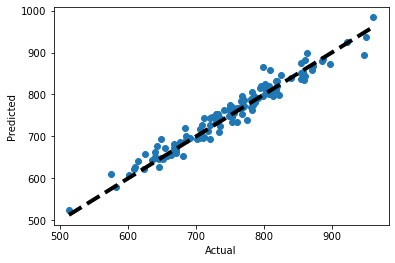

In [84]:
plt.subplots()
plt.scatter(y_test, model_y)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

References

http://adilmoujahid.com/posts/2014/07/baseball-analytics/ (reproduced from this page)